# Test & Roll: Website Example

Meta-analysis and test & roll design for website example (Elea McDonnell Feit & Ron Berman)

## Imports

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.filterwarnings('ignore')

import pystan
import multiprocessing
import stan_utility

from pytestroll.pytestroll import (
    NHST,
    TestRoll
    )

from pytestroll.utils import (
    stan_model_summary
    )

## Generate synthetic data

In [2]:
def generate_syn_expt(nexpt, nobs, mu, sigma, omega, seed=42):
    
    np.random.seed(seed)
    
    nobs = np.full((nexpt, 2), nobs, dtype=int)
    y = np.zeros(shape=(nexpt,2))
   
    for e in range(nexpt):
        t =  np.random.normal(mu, omega, size=1)
        m =  np.random.normal(t, sigma, size=2)
           
        while np.min(np.concatenate((t, m))) < 0 or np.max(np.concatenate((t, m))) > 1:
            t =  np.random.normal(mu, omega, size=1)
            m =  np.random.normal(t, sigma, size=2)    
     
        y[e, 0] = np.mean(np.random.normal(m[0], np.sqrt(m[0]*(1-m[0])), nobs[e,0]))
        y[e, 1] = np.mean(np.random.normal(m[1], np.sqrt(m[1]*(1-m[1])), nobs[e,1]))
          
    return {"nexpt": nexpt, "y":y, "nobs":nobs}


d = generate_syn_expt(nexpt=50, nobs=10000, mu=0.676, sigma=0.030, omega=0.199)

## Meta-analysis of website test data

In [3]:
sm = pystan.StanModel('/Users/lguelman/Library/Mobile Documents/com~apple~CloudDocs/LG_Files/Development/pytestroll/src/stan/website.stan') 
multiprocessing.set_start_method("fork", force=True)
fit = sm.sampling(data=d, iter=2000, chains=4, seed=19348)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_484bd5f15ab2de104a8e26e411217e60 NOW.
In file included from /var/folders/kw/_5nyl9vx5pn29m885dzd3hkm0000gn/T/pystan_fu9ye4cb/stanfit4anon_model_484bd5f15ab2de104a8e26e411217e60_7111117097346436962.cpp:778:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/numpy/core/include/numpy/arrayobject.h:5:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/numpy/core/include/numpy/ndarrayobject.h:12:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/numpy/core/include/numpy/ndarraytypes.h:1960:
/Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: "Using deprecated NumPy API, disable it with "          "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-W#warnings]
#warning "Using deprecated NumPy API, disable it with " 

/var/folders/kw/_5nyl9vx5pn29m885dzd3hkm0000gn/T/pystan_fu9ye4cb/stanfit4anon_model_484bd5f15ab2de104a8e26e411217e60_7111117097346436962.cpp:33121:5: warning: 'tp_print' is deprecated [-Wdeprecated-declarations]
    0,
    ^
/Users/lguelman/opt/anaconda3/envs/pytestroll/include/python3.8/cpython/object.h:260:5: note: 'tp_print' has been explicitly marked deprecated here
    Py_DEPRECATED(3.8) int (*tp_print)(PyObject *, FILE *, int);
    ^
/Users/lguelman/opt/anaconda3/envs/pytestroll/include/python3.8/pyport.h:515:54: note: expanded from macro 'Py_DEPRECATED'
#define Py_DEPRECATED(VERSION_UNUSED) __attribute__((__deprecated__))
                                                     ^
In file included from /var/folders/kw/_5nyl9vx5pn29m885dzd3hkm0000gn/T/pystan_fu9ye4cb/stanfit4anon_model_484bd5f15ab2de104a8e26e411217e60_7111117097346436962.cpp:787:
In file included from opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/l

In file included from /var/folders/kw/_5nyl9vx5pn29m885dzd3hkm0000gn/T/pystan_fu9ye4cb/stanfit4anon_model_484bd5f15ab2de104a8e26e411217e60_7111117097346436962.cpp:787:
In file included from opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_

In file included from /var/folders/kw/_5nyl9vx5pn29m885dzd3hkm0000gn/T/pystan_fu9ye4cb/stanfit4anon_model_484bd5f15ab2de104a8e26e411217e60_7111117097346436962.cpp:787:
In file included from opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_

In file included from /var/folders/kw/_5nyl9vx5pn29m885dzd3hkm0000gn/T/pystan_fu9ye4cb/stanfit4anon_model_484bd5f15ab2de104a8e26e411217e60_7111117097346436962.cpp:788:
In file included from opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan_fit.hpp:15:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/boost_1.69.0/boost/random/additive_combine.hpp:27:
/Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/boost_1.69.0/boost/random/linear_congruential.hpp:140:20: warning: overlapping comparisons always evaluate to false [-Wtautological-overlap-compare]
        if(_x <= 0 && _x != 0) {
           ~~~~~~~~^~~~~~~~~~
/Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/boost_1.69.0/boost/random/linear_congruential.hpp:393:11: note: in instantiation of member function 'boost::random::linear_congruen

In file included from /var/folders/kw/_5nyl9vx5pn29m885dzd3hkm0000gn/T/pystan_fu9ye4cb/stanfit4anon_model_484bd5f15ab2de104a8e26e411217e60_7111117097346436962.cpp:787:
In file included from opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_

In file included from /var/folders/kw/_5nyl9vx5pn29m885dzd3hkm0000gn/T/pystan_fu9ye4cb/stanfit4anon_model_484bd5f15ab2de104a8e26e411217e60_7111117097346436962.cpp:787:
In file included from opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_

In file included from /var/folders/kw/_5nyl9vx5pn29m885dzd3hkm0000gn/T/pystan_fu9ye4cb/stanfit4anon_model_484bd5f15ab2de104a8e26e411217e60_7111117097346436962.cpp:787:
In file included from opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_

In file included from /var/folders/kw/_5nyl9vx5pn29m885dzd3hkm0000gn/T/pystan_fu9ye4cb/stanfit4anon_model_484bd5f15ab2de104a8e26e411217e60_7111117097346436962.cpp:787:
In file included from opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_

In file included from /var/folders/kw/_5nyl9vx5pn29m885dzd3hkm0000gn/T/pystan_fu9ye4cb/stanfit4anon_model_484bd5f15ab2de104a8e26e411217e60_7111117097346436962.cpp:787:
In file included from opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_

In file included from /var/folders/kw/_5nyl9vx5pn29m885dzd3hkm0000gn/T/pystan_fu9ye4cb/stanfit4anon_model_484bd5f15ab2de104a8e26e411217e60_7111117097346436962.cpp:787:
In file included from opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_

In file included from /var/folders/kw/_5nyl9vx5pn29m885dzd3hkm0000gn/T/pystan_fu9ye4cb/stanfit4anon_model_484bd5f15ab2de104a8e26e411217e60_7111117097346436962.cpp:787:
In file included from opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_

In file included from /var/folders/kw/_5nyl9vx5pn29m885dzd3hkm0000gn/T/pystan_fu9ye4cb/stanfit4anon_model_484bd5f15ab2de104a8e26e411217e60_7111117097346436962.cpp:787:
In file included from opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/lguelman/opt/anaconda3/envs/pytestroll/lib/python3.8/site-packages/pystan/stan/lib/stan_

160 warnings generated.



Gradient evaluation took 0.000159 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.59 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.000254 seconds
1000 transitions using 10 leapfrog steps per transition would take 2.54 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.000133 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.33 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.000161 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.61 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:    1 / 2000 [  0%]  (Warmup)


Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'website.stan' at line 23)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'website.stan' at line 24)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following 

Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  400 / 2000 [ 20%]  (Warmup)
Iteration:  400 / 2000 [ 20%]  (Warmup)
Iteration:  400 / 2000 [ 20%]  (Warmup)
Iteration:  400 / 2000 [ 20%]  (Warmup)
Iteration:  600 / 2000 [ 30%]  (Warmup)
Iteration:  600 / 2000 [ 30%]  (Warmup)
Iteration:  600 / 2000 [ 30%]  (Warmup)
Iteration:  600 / 2000 [ 30%]  (Warmup)
Iteration:  800 / 2000 [ 40%]  (Warmup)
Iteration:  800 / 2000 [ 40%]  (Warmup)
Iteration:  800 / 2000 [ 40%]  (Warmup)
Iteration:  800 / 2000 [ 40%]  (Warmup)
Iteration: 1000 / 2000 [ 50%]  (Warmup)
Iteration: 1001 / 2000 [ 50%]  (Sampling)
Iteration: 1000 / 2000 [ 50%]  (Warmup)
Iteration: 1001 / 2000 [ 50%]  (Sampling)
Iteration: 1000 / 2000 [ 50%]  (Warmup)
Iteration: 1001 / 2000 [ 50%]  (Sampling)
Iteration: 1000 / 2000 [ 50%]  (Warmup)
Iteration: 1001 / 2000 [ 50%]  (Sampling)
Iteration: 1200 / 2000 [ 60%]  (

In [4]:
fit_summary = stan_model_summary(fit)
fit_summary

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
"m[1,1]",0.769922,0.000052,0.004178,0.761742,0.767105,0.769860,0.772729,0.778237,6405.597741,0.999481
"m[2,1]",0.741556,0.000054,0.004357,0.733079,0.738646,0.741571,0.744457,0.750064,6446.659013,0.999506
"m[3,1]",0.348951,0.000055,0.004644,0.339783,0.345847,0.348911,0.352101,0.357833,7202.841830,0.999550
"m[4,1]",0.832571,0.000045,0.003834,0.824728,0.830049,0.832618,0.835166,0.840062,7109.956910,0.999530
"m[5,1]",0.445349,0.000061,0.004828,0.435793,0.442219,0.445472,0.448431,0.454824,6277.964294,0.999189
...,...,...,...,...,...,...,...,...,...,...
t[50],0.317809,0.000239,0.019481,0.278758,0.304899,0.317177,0.330654,0.356616,6636.287878,0.999320
mu,0.658053,0.000303,0.026033,0.606262,0.641177,0.657821,0.675579,0.709322,7359.597701,0.999997
sigma,0.026483,0.000070,0.002833,0.021591,0.024557,0.026207,0.028198,0.032919,1647.784648,1.001069
omega,0.179170,0.000220,0.017797,0.147344,0.166783,0.177528,0.190634,0.217286,6554.701638,0.999341


In [5]:
# MCMCM Diagnostics
stan_utility.utils.check_treedepth(fit)
stan_utility.utils.check_energy(fit)
stan_utility.utils.check_div(fit)

0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior
0.0 of 4000 iterations ended with a divergence (0.0%)


## Design Test & Roll

To replicate the exact results in the paper, use these rounded values.


In [6]:
mu = 0.68
sigma = 0.03
N = 100000

In [7]:
# Profit-maximizing
tr = TestRoll(N = N, s = np.sqrt(mu*(1-mu)), mu = mu, sigma = sigma)
n_star = tr.tr_size_nn()
print("Test & Roll samples:", n_star, '\n')

print("Test & Roll - Evaluation Summary:")
ev = tr.eval_nn(n=n_star)
ev

Test & Roll samples: [2283.89002819 2283.89002819] 

Test & Roll - Evaluation Summary:


{'n1': 2283.8900281944257,
 'n2': 2283.8900281944257,
 'profit_per_cust': 0.695359986175474,
 'profit': 69535.9986175474,
 'profit_test': 3106.090438344419,
 'profit_deploy': 66429.90817920299,
 'profit_rand': 68000.0,
 'profit_perfect': 69692.56875064327,
 'profit_gain': 0.9074955548858128,
 'regret': 0.0022465828983297964,
 'error_rate': 0.10012814134507947,
 'deploy_1_rate': 0.5,
 'tie_rate': 0.0}

In [8]:
# Compare to standard NHT 

d = 0.68*0.02 # 2% lift 

nht = NHST(s=np.sqrt(mu*(1-mu)), d=d)
n_nht = nht.nht_size_nn()
print("NHST Samples:", n_nht, '\n')


print("NHST - Evaluation Summary:")
ev_nht = tr.eval_nn(n=n_nht)
ev_nht

NHST Samples: [18467.95231612 18467.95231612] 

NHST - Evaluation Summary:


{'n1': 18467.9523161155,
 'n2': 18467.9523161155,
 'profit_per_cust': 0.6906048394929888,
 'profit': 69060.48394929888,
 'profit_test': 25116.415149917084,
 'profit_deploy': 43944.0687993818,
 'profit_rand': 68000.0,
 'profit_perfect': 69692.56875064327,
 'profit_gain': 0.6265529532527635,
 'regret': 0.009069615493812022,
 'error_rate': 0.03626305490143705,
 'deploy_1_rate': 0.5,
 'tie_rate': 0.0}

In [9]:
# Compare to NHT with Finite Population Correction

n_nht_fpc = nht.nht_size_nn(N=100000)
print("NHST Samples (w/ fpc):", n_nht_fpc, '\n')


print("NHST (w/ fpc)- Evaluation Summary:")
ev_nht_fpc = tr.eval_nn(n=n_nht_fpc)
ev_nht_fpc

NHST Samples (w/ fpc): [13486.66533614 13486.66533614] 

NHST (w/ fpc)- Evaluation Summary:


{'n1': 13486.665336142949,
 'n2': 13486.665336142949,
 'profit_per_cust': 0.6922509412708583,
 'profit': 69225.09412708583,
 'profit_test': 18341.86485715441,
 'profit_deploy': 50883.22926993142,
 'profit_rand': 68000.0,
 'profit_perfect': 69692.56875064327,
 'profit_gain': 0.7238076010916692,
 'regret': 0.006707668147949097,
 'error_rate': 0.04236729587385757,
 'deploy_1_rate': 0.5,
 'tie_rate': 0.0}

## Profit and error rate as a function of $n$ (Figure 3)

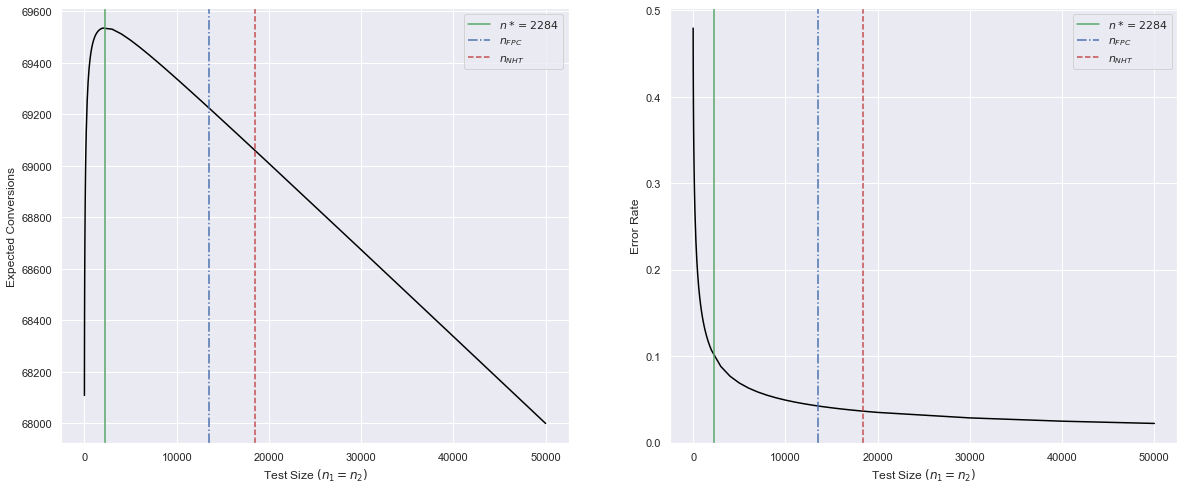

In [10]:
n = np.concatenate(
    (np.linspace(1, 19, 19, endpoint=True), 
     np.linspace(20, 19*10, 18, endpoint=True),
     np.linspace(200, 19*100, 18, endpoint=True),
     np.linspace(2000, 19*1000, 18, endpoint=True),
     np.linspace(20000, 50000, 4, endpoint=True),
     ),
    )
out = list()

for i in range(len(n)):
    out.append(
        TestRoll(N=N, s=np.sqrt(mu*(1-mu)), mu=mu, sigma=sigma).eval_nn(n=np.repeat(n[i], 2))
        )
out = pd.DataFrame(out)

fig, axs = plt.subplots(1,2, figsize=(20, 8), facecolor='w', edgecolor='k')
        
p = sns.lineplot(ax=axs[0], data=out, x="n1", y="profit", color= 'black')
p.set_xlabel(r'Test Size $(n_1=n_2)$')
p.set_ylabel("Expected Conversions")
p.axvline(n_star[0], color= 'g', label=r'$n*=2284$')
p.axvline(n_nht_fpc[0], color='b', linestyle='-.', label=r'$n_{FPC}$')
p.axvline(n_nht[0], color='r', linestyle='--', label=r'$n_{NHT}$')
p.legend()

p = sns.lineplot(ax=axs[1], data=out, x="n1", y="error_rate", color= 'black')
p.set_xlabel(r'Test Size $(n_1=n_2)$')
p.set_ylabel("Error Rate")
p.axvline(n_star[0], color= 'g', label=r'$n*=2284$')
p.axvline(n_nht_fpc[0], color='b', linestyle='-.', label=r'$n_{FPC}$')
p.axvline(n_nht[0], color='r', linestyle='--', label=r'$n_{NHT}$')
p.legend()

## Sample size sensitivities (Figure 4)

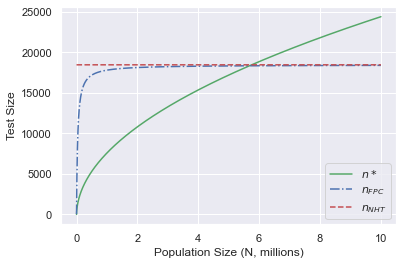

In [11]:
# Optimal sample sizes for different N 
N = np.concatenate(
    (np.linspace(100, 1000, 10, endpoint=True), 
     np.linspace(2000, 10000*1000, 10000, endpoint=True),
     ),
    )

tr = np.zeros((len(N)))
fpc = np.zeros((len(N)))
for i in range(len(N)):   
    tr[i]  = TestRoll(N=N[i], s=np.sqrt(mu*(1-mu)), sigma=sigma).tr_size_nn()[0]
    fpc[i] = NHST(s=np.sqrt(mu*(1-mu)), d=d, conf=0.95, power=0.8).nht_size_nn(N=N[i])[0]
    
out2 = pd.DataFrame({'N':N/1000000, 'tr':tr, 'fpc':fpc, 'nht': n_nht[0]})    

fig, ax = plt.subplots()
p = sns.lineplot(data=out2, x="N", y="tr", color= 'g', label =r'$n*$')
p = sns.lineplot(data=out2, x="N", y="fpc", color= 'b', linestyle='-.', label =r'$n_{FPC}$')
p = sns.lineplot(data=out2, x="N", y="nht", color= 'r', linestyle='--', label =r'$n_{NHT}$')
p.set_xlabel('Population Size (N, millions)')
p.set_ylabel("Test Size")
p.legend()

[(0.0, 25000.0)]

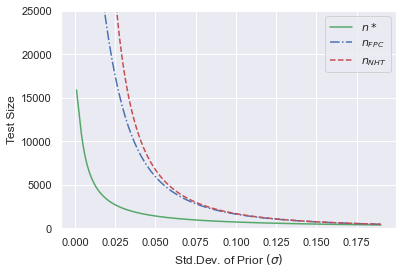

In [12]:
# Optimal sample sizes for different sigma
N=100000
sigma = np.linspace(0.001, 0.19, 190, endpoint=True)
d = norm.ppf(q=0.5+0.125, loc=0, scale=np.sqrt(2)*sigma) #25th percentile of prior on te
tr = np.zeros((len(sigma)))
fpc = np.zeros((len(sigma)))
nht = np.zeros((len(sigma)))

for i in range(len(sigma)):
    tr[i] = TestRoll(N=N, s=np.sqrt(mu*(1-mu)), sigma=sigma[i]).tr_size_nn()[0]
    fpc[i] = NHST(s=np.sqrt(mu*(1-mu)), d=d[i], conf=0.95, power=0.8).nht_size_nn(N=N)[0]
    nht[i] = NHST(s=np.sqrt(mu*(1-mu)), d=d[i], conf=0.95, power=0.8).nht_size_nn()[0]
    #tr[i] = test_size_nn(N, s=np.sqrt(mu*(1-mu)), sigma=sigma[i])[0]
    #fpc[i] = test_size_nht(s=np.sqrt(mu*(1-mu)), d=d[i], conf=0.95, power=0.8, N=N)[0]
    #nht[i] = test_size_nht(s=np.sqrt(mu*(1-mu)), d=d[i], conf=0.95, power=0.8)[0]
out3 = pd.DataFrame({'sigma':sigma, 'tr':tr, 'fpc':fpc, 'nht': nht})    

  
fig, ax = plt.subplots()
p = sns.lineplot(data=out3, x="sigma", y="tr", color= 'g', label =r'$n*$')
p = sns.lineplot(data=out3, x="sigma", y="fpc", color= 'b', linestyle='-.', label =r'$n_{FPC}$')
p = sns.lineplot(data=out3, x="sigma", y="nht", color= 'r', linestyle='--', label =r'$n_{NHT}$')
p.set_xlabel(r'Std.Dev. of Prior $(\sigma)$')
p.set_ylabel("Test Size")
p.legend()
p.set(ylim=(0, 25000))

[(0.0, 25000.0)]

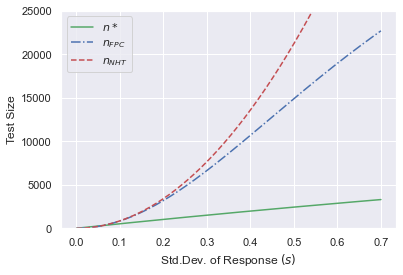

In [13]:
# Optimal sample sizes for different s

N = 100000
sigma = 0.03
d = 0.68*0.02
s = np.linspace(0.001, 0.7, 350, endpoint=True)
tr = np.zeros((len(s)))
fpc = np.zeros((len(s)))
nht = np.zeros((len(s)))
for i in range(len(s)):
    tr[i] = TestRoll(N=N, s=s[i], sigma=sigma).tr_size_nn()[0]
    fpc[i] = NHST(s[i], d=d, conf=0.95, power=0.8).nht_size_nn(N=N)[0]
    nht[i] = NHST(s[i], d=d, conf=0.95, power=0.8).nht_size_nn()[0]

out4 = pd.DataFrame({'s':s, 'tr':tr, 'fpc':fpc, 'nht': nht})    


fig, ax = plt.subplots()
p = sns.lineplot(data=out4, x="s", y="tr", color= 'g', label =r'$n*$')
p = sns.lineplot(data=out4, x="s", y="fpc", color= 'b', linestyle='-.', label =r'$n_{FPC}$')
p = sns.lineplot(data=out4, x="s", y="nht", color= 'r', linestyle='--', label =r'$n_{NHT}$')
p.set_xlabel(r'Std.Dev. of Response $(s)$')
p.set_ylabel("Test Size")
p.legend()
p.set(ylim=(0, 25000))

## Regret distribution and comparison with Thompson Sampling 

In [14]:
s = mu*(1-mu) # should this be sqrt?
out = TestRoll(N=N, s=s, mu=mu, sigma=sigma).profit_nn_sim(n = n_star, K=2, TS=True, R=10000, seed=42)
out

{'profit':                 perfect_info  test_roll        TS
 0  mean_profit      0.697188   0.696202  0.696968
 1           5%      0.659185   0.658551  0.658807
 2          95%      0.738065   0.736698  0.737941,
 'regret':                 perfect_info  test_roll        TS
 0  mean_profit           0.0   0.001405  0.000319
 1           5%           0.0   0.000108  0.000061
 2          95%           0.0   0.003309  0.000888,
 'error_rate': 0.0539,
 'deploy_1_rate': 0.506,
 'profit_draws':       perfect_info     test_roll     thom_samp  error  deploy_1
 0     66234.364556  66132.494013  66222.787296  False      True
 1     71134.137385  70612.044991  71085.351431   True      True
 2     71264.163018  71171.465296  71253.944890  False      True
 3     69804.424916  69686.178251  69793.739463  False      True
 4     68155.163746  66698.723029  68093.983991   True      True
 ...            ...           ...           ...    ...       ...
 9995  66236.322691  66168.329203  66223.867156  Fa

In [15]:
out['profit']

,,perfect_info,test_roll,TS
0,mean_profit,0.697188,0.696202,0.696968
1,5%,0.659185,0.658551,0.658807
2,95%,0.738065,0.736698,0.737941


In [16]:
out['regret']

,,perfect_info,test_roll,TS
0,mean_profit,0.0,0.001405,0.000319
1,5%,0.0,0.000108,0.000061
2,95%,0.0,0.003309,0.000888
